In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [2]:
data = pd.read_csv('Electric_production.csv')
data.head()

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [3]:
data = data.rename(columns={"IPG2211A2N": "y","DATE":"date"})
data.head()

,date,y
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


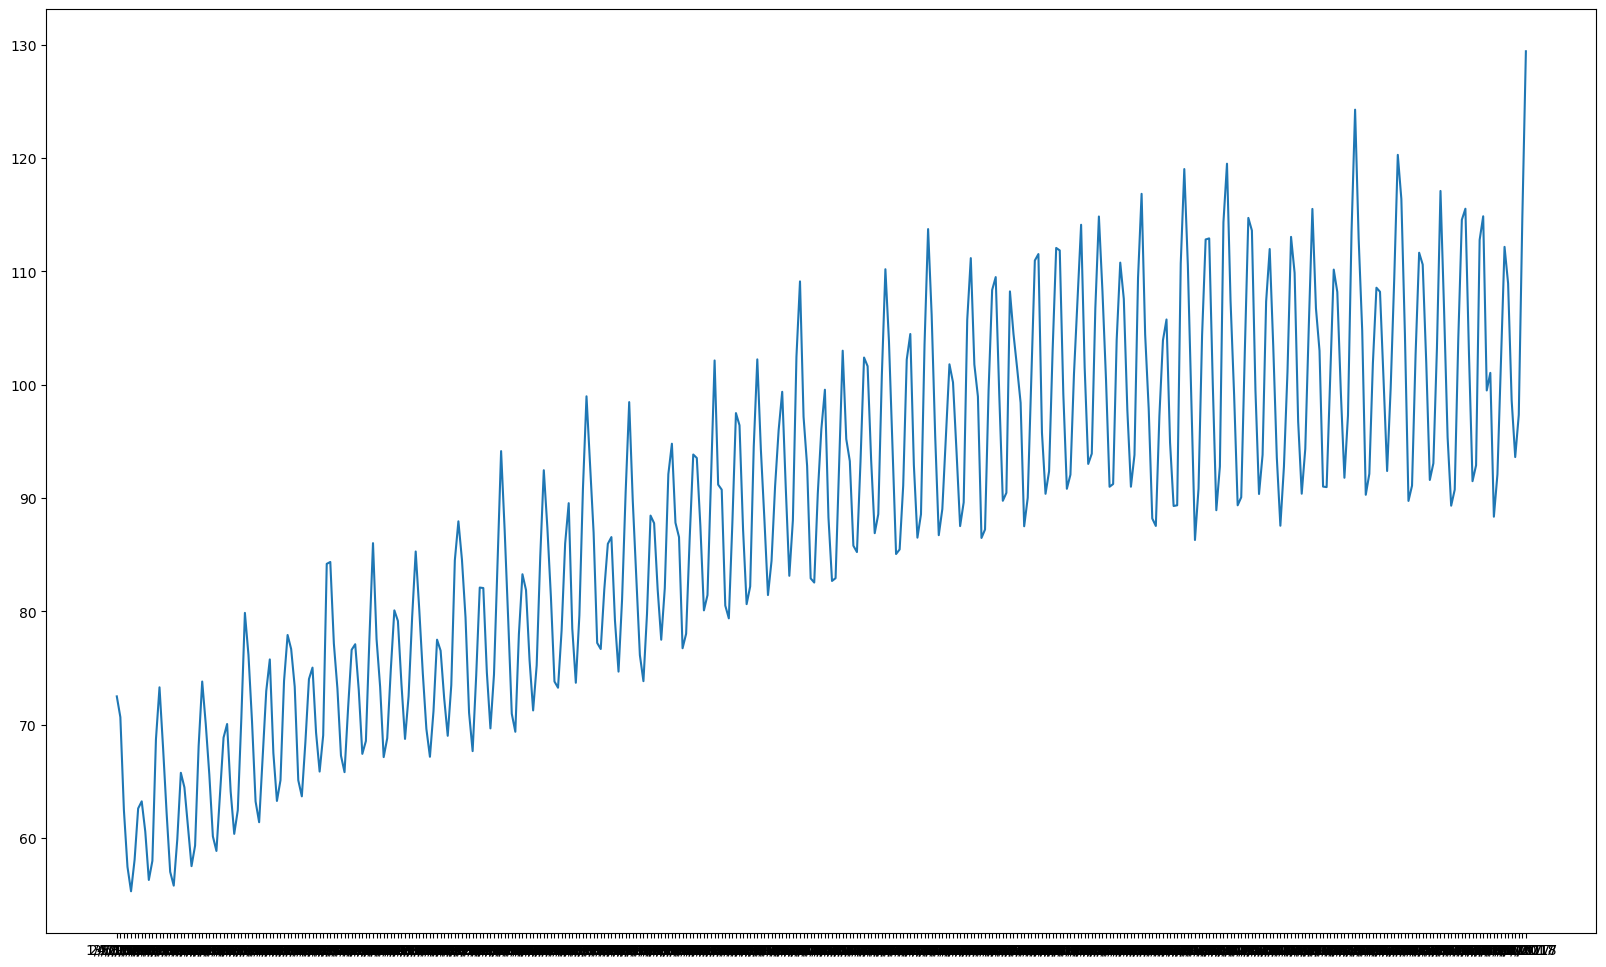

In [4]:
plt.figure(figsize=(20,12))
plt.plot(data["date"],data["y"])
plt.show()

In [5]:
adfuller(data["y"]) #p-values < 0.05

(-2.2569903500472472,
 0.18621469116586692,
 15,
 381,
 {'1%': -3.4476305904172904,
  '5%': -2.869155980820355,
  '10%': -2.570827146203181},
 1840.8474501627156)

In [6]:
data["y"] = np.log(data["y"]) # for stationary 

In [7]:
adfuller(data["y"]) #p-values < 0.05 

(-3.1453604281077094,
 0.023373401032986466,
 15,
 381,
 {'1%': -3.4476305904172904,
  '5%': -2.869155980820355,
  '10%': -2.570827146203181},
 -1627.1090225668188)

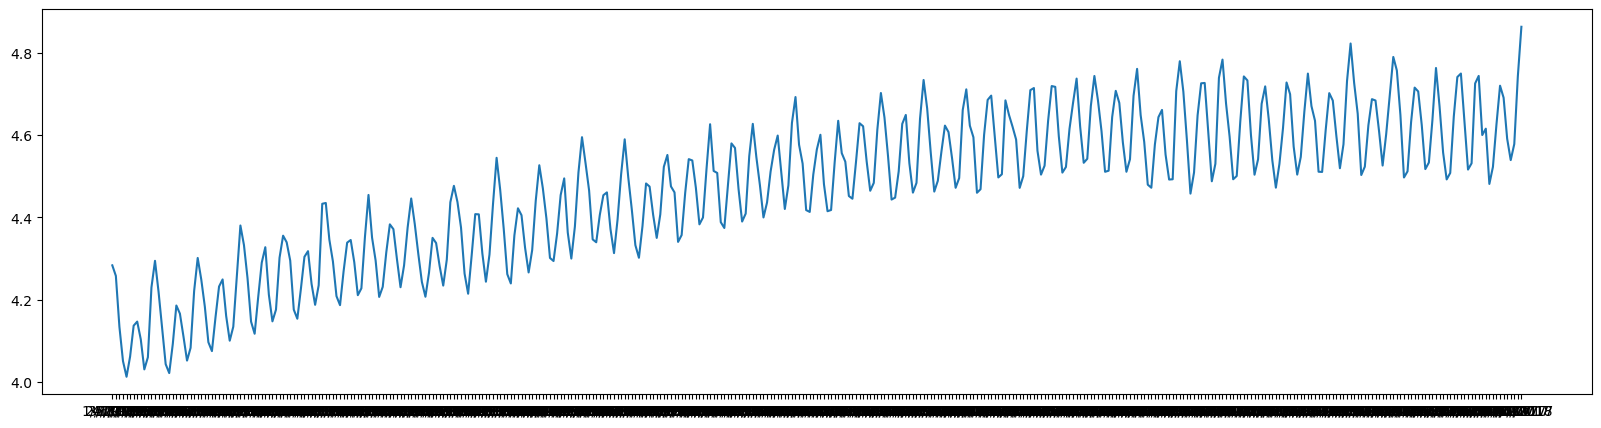

In [8]:
plt.figure(figsize=(20,5))
plt.plot(data["date"],data["y"])
plt.show()

In [9]:
data["y"] = data["y"].diff(1)

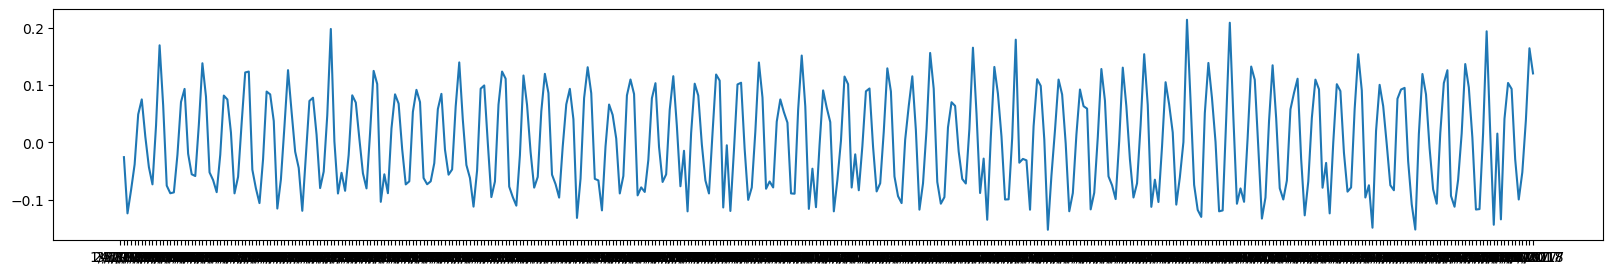

In [10]:
plt.figure(figsize=(20,3))
plt.plot(data["date"],data["y"])
plt.show()

In [24]:
data = data.drop(data.index[0])
adfuller(data["y"])

(-6.7483333700191315,
 2.995161498116069e-09,
 14,
 381,
 {'1%': -3.4476305904172904,
  '5%': -2.869155980820355,
  '10%': -2.570827146203181},
 -1613.488834000363)